In [41]:
# rich output 출력위치 설정
# => 웹 브라우저에서 바로 봄
get_ipython().run_line_magic('matplotlib', 'inline')

# 색상 출력
# 설치 방법 => pip install termcolor
from termcolor import colored
def c(tag, data, under=3):

    val = colored(tag + ':\n', 'magenta', attrs=['bold'])
    t = type(data)
    val += colored(t, 'magenta')
    under = str(under)
    
    import numpy
    if t is float or t is numpy.float64:
        val += ('\n{:.' + under + 'f}\n').format(data)
    else:
        val += '\n{}\n'.format(data)
    return val

#### <span style="color:#184;background:#EEE">2.3.3. 선형 모델</span><br>

- 100년도 더 된 유서깊은 알고리즘
- 입력 특성에 대한 선형 함수를 만들어 예측을 수행
- 분류/회귀 모두에 쓰임, 여기에서는 회귀부터 살펴봄<br><br>

- **<span style="color:#C22">회귀의 선형 모델</span>**<br><br>

    - 특성이 하나일 땐 직선이 됨
    - 특성이 두 개일 땐 평면이 됨
    - 특성이 여러 개일 땐 초평면(hyperplane)이 됨<br><br>
    
    - **고차원 데이터에서 매우 우수한 성능을 보임 <span style="color:#C22">(과대적합 주의)</span>**

w[0]: 0.393906  b: -0.031804


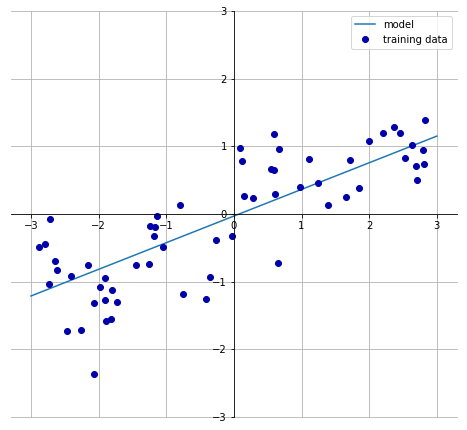

In [42]:
import sys
sys.path.append('..')
import mglearn

mglearn.plots.plot_linear_regression_wave() # 체험용

# 데이터의 상세 정보를 모두 잃어버린 것처럼 보임
# 어느 정도는 사실인데, 타깃 y가 주어진 특성의 선형 조합이라는 것은 비현실적일 수도 있음
# 그러나 1차원 데이터에 대한 편견일뿐, 고차원일 경우 완벽하게 선형 함수로 모델링 가능

- **<span style="color:#C22">선형 회귀(최소제곱법)</span>**<br><br>
    
    - linear regression(OLS: ordinary least squares)
    - 예측과 훈련 셋의 타깃 y 사이의 **평균제곱오차(MSE: mean squared error)** 를 최소화하는 w, b를 탐색<br><br>
    
    - w는 가중치(weight) 또는 계수(coefficient)
    - b는 편향(offset) 또는 절편(intercept)

In [43]:
import sys
sys.path.append('..')
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

# 과소적합의 예시
# 스코어가 모두 낮음
print(c('wave train score', lr.score(X_train, y_train)))
print(c('wave test score', lr.score(X_test, y_test)))

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

# 과대적합의 예시
# 훈련 점수는 높지만 테스트 점수는 낮음
print(c('boston train score', lr.score(X_train, y_train)))
print(c('boston test score', lr.score(X_test, y_test)))

# 단순 MSE 방법은 과대적합을 해결하기 어려움
# --> 고차원 데이터일수록 더 어려움

wave train score:
<class 'numpy.float64'>
0.670

wave test score:
<class 'numpy.float64'>
0.659

boston train score:
<class 'numpy.float64'>
0.952

boston test score:
<class 'numpy.float64'>
0.606



- **<span style="color:#C22">릿지 회귀</span>**<br><br>
    
    - 릿지(ridge) 회귀는 가중치 선택에 대한 제약을 추가함
    - 이 제약을 **규제(regularization)** 라고 하며 L2 노름(norm)을 사용
    - 제약의 정도를 **alpha** 값으로 조정<br><br>
    
    - 규제의 동작은 가중치를 0에 가깝게 해줌
    - 가중치의 절댓값이 튈 수록 큰 패널티를 줘서 0 근처로 유지되게 함

boston train score:
<class 'numpy.float64'>
0.929

boston test score:
<class 'numpy.float64'>
0.772



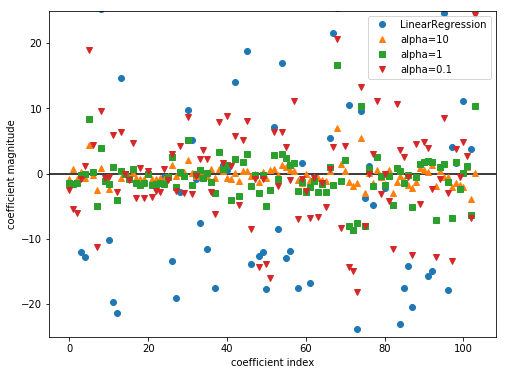

In [44]:
import sys
sys.path.append("..")
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
ridge_a = Ridge(alpha=10).fit(X_train, y_train)
ridge_b = Ridge(alpha=1).fit(X_train, y_train)
ridge_c = Ridge(alpha=0.1).fit(X_train, y_train)

# 가장 좋은 성과를 가짐 alpha=0.1
print(c('boston train score', ridge_c.score(X_train, y_train)))
print(c('boston test score', ridge_c.score(X_test, y_test)))

# 가중치를 확인해보면 규제의 효과를 확인할 수 있음
# 릿지에서는 alpha가 클수록 규제가 커짐
plt.figure(figsize=(8, 6))

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.plot(ridge_a.coef_, '^', label='alpha=10')
plt.plot(ridge_b.coef_, 's', label='alpha=1')
plt.plot(ridge_c.coef_, 'v', label='alpha=0.1')

plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

- 규제의 효과를 확인하는 또 다른 방법<br><br>

    - alpha 값을 고정하고 훈련 데이터 셋의 크기를 변화
    - 데이터셋의 크기에 따른 모델의 성능 변화 곡선을 **학습 곡선(learning curve)** 이라고 함

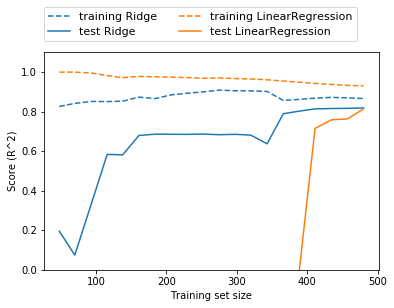

In [45]:
import sys
sys.path.append('..')
import mglearn

mglearn.plots.plot_ridge_n_samples() # 체험용

- **<span style="color:#C22">라쏘 (릿지의 대안)</span>**<br><br>
    
    - 라쏘(lasso) 회귀는 L1 노름을 사용
    - 어떤 계수를 0으로 만들어버림 = **자동특성선택(auto feature selection)**<br><br>
    
    - 릿지? 라쏘?<br><br>

        - 보통 릿지를 선호
        - 특성이 많은데 일부분만 필요하다면 라쏘가 유용할 수도 있음
        - 라쏘는 쉽게 해석할 수 있음

train set score:
<class 'numpy.float64'>
0.897

test set score:
<class 'numpy.float64'>
0.766

num of used features:
<class 'numpy.int32'>
33



Text(0,0.5,'coefficient magnitude')

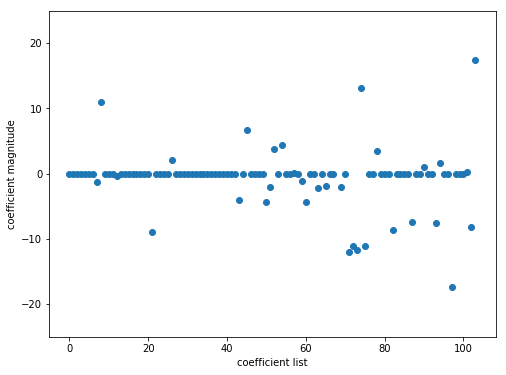

In [46]:
import sys
sys.path.append('..')
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# alpha를 기본(1)에서 낮추면 max_iter를 증가시켜야 함
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print(c('train set score', lasso.score(X_train, y_train)))
print(c('test set score', lasso.score(X_test, y_test)))

# 사용된(0이 아닌) 특성의 개수
print(c('num of used features', np.sum(lasso.coef_ != 0)))

# 계수 확인
# => 대부분이 0인 것을 확인할 수 있음
plt.figure(figsize=(8, 6))
plt.plot(lasso.coef_, 'o')
plt.ylim(-25, 25)
plt.xlabel('coefficient list')
plt.ylabel('coefficient magnitude')

- **<span style="color:#C22">분류용 선형 모델</span>**<br><br>
    
    - 분류용 선형 모델은 **결정 경계가 입력의 선형 함수**
    - 이진 분류기는 선, 평면, 초평면으로 두 개의 클래스를 구분<br><br>
    
    - 대표적인 선형 분류 알고리즘<br><br>
    
        - **로지스틱 회귀(logistic regression)** <= 분류 알고리즘임!!
        - **(선형) 서포트 벡터 머신(support vector machine)**<br><br>
        
    - 낮은 차원에서는 비효율적인 것 같지만 고차원에서는 강력함
    - 두 모델 모두 C값으로 규제의 강도를 지정
        - 낮을수록 강도가 커짐

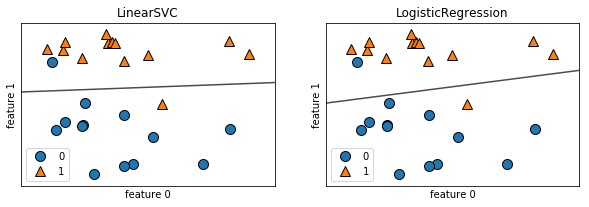

In [47]:
# LinearSVC, LinearRegression 사용해보기

import sys
sys.path.append('..')
import mglearn

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    
axes[0].legend()
axes[1].legend()

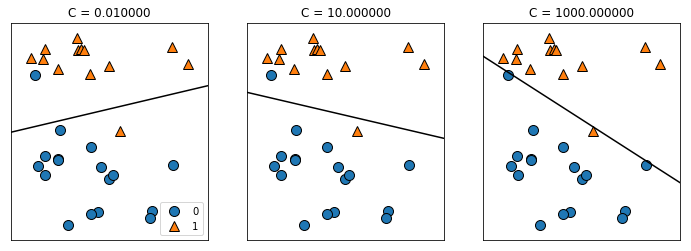

In [48]:
import sys
sys.path.append('..')
import mglearn

# C 값에 따른 규제 확인하기
# => 규제가 작을수록(C가 커질수록) 훈련 세트에 맞추려 함
# => 다른 말로, 데이터 포인트 하나하나 정확히 분류하려 함
mglearn.plots.plot_linear_svc_regularization()

shape of cancer data:
<class 'tuple'>
(569, 30)

shape of X_train:
<class 'tuple'>
(426, 30)

shape of X_test:
<class 'tuple'>
(143, 30)


(L1, C=100) - train set score:
<class 'numpy.float64'>
0.986

(L1, C=100) - test set score:
<class 'numpy.float64'>
0.979

(L1, C=1) - train set score:
<class 'numpy.float64'>
0.960

(L1, C=1) - test set score:
<class 'numpy.float64'>
0.958

(L1, C=0.01) - train set score:
<class 'numpy.float64'>
0.918

(L1, C=0.01) - test set score:
<class 'numpy.float64'>
0.930


(L2, C=100) - train set score:
<class 'numpy.float64'>
0.972

(L2, C=100) - test set score:
<class 'numpy.float64'>
0.965

(L2, C=1) - train set score:
<class 'numpy.float64'>
0.955

(L2, C=1) - test set score:
<class 'numpy.float64'>
0.958

(L2, C=0.01) - train set score:
<class 'numpy.float64'>
0.934

(L2, C=0.01) - test set score:
<class 'numpy.float64'>
0.930



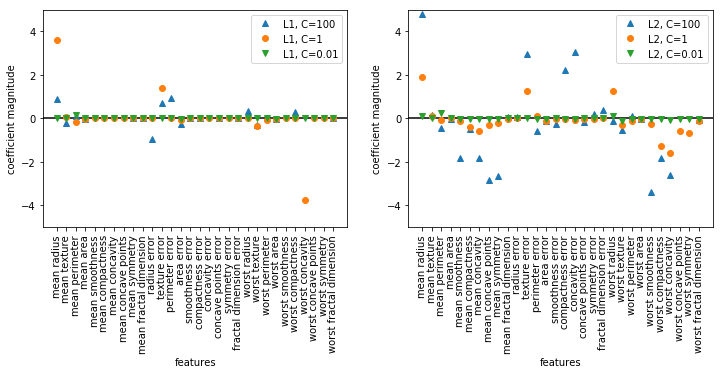

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

print(c('shape of cancer data', cancer.data.shape))
print(c('shape of X_train', X_train.shape))
print(c('shape of X_test', X_test.shape))

# 서로 다른 C 값으로 분류해보기 & 규제 L1, L2

logreg_a1 = LogisticRegression(penalty='l1', C=100).fit(X_train, y_train)
logreg_b1 = LogisticRegression(penalty='l1', C=1).fit(X_train, y_train)
logreg_c1 = LogisticRegression(penalty='l1', C=0.01).fit(X_train, y_train)

logreg_a2 = LogisticRegression(penalty='l2', C=100).fit(X_train, y_train)
logreg_b2 = LogisticRegression(penalty='l2', C=1).fit(X_train, y_train)
logreg_c2 = LogisticRegression(penalty='l2', C=0.01).fit(X_train, y_train)

# 복잡도가 높으면 성능이 우수, 그러나 과대적합은 주의해야 함
# => C 조절 및 L1, L2 선택 등

print()

print(c('(L1, C=100) - train set score', logreg_a1.score(X_train, y_train)))
print(c('(L1, C=100) - test set score', logreg_a1.score(X_test, y_test)))
print(c('(L1, C=1) - train set score', logreg_b1.score(X_train, y_train)))
print(c('(L1, C=1) - test set score', logreg_b1.score(X_test, y_test)))
print(c('(L1, C=0.01) - train set score', logreg_c1.score(X_train, y_train)))
print(c('(L1, C=0.01) - test set score', logreg_c1.score(X_test, y_test)))

print()

print(c('(L2, C=100) - train set score', logreg_a2.score(X_train, y_train)))
print(c('(L2, C=100) - test set score', logreg_a2.score(X_test, y_test)))
print(c('(L2, C=1) - train set score', logreg_b2.score(X_train, y_train)))
print(c('(L2, C=1) - test set score', logreg_b2.score(X_test, y_test)))
print(c('(L2, C=0.01) - train set score', logreg_c2.score(X_train, y_train)))
print(c('(L2, C=0.01) - test set score', logreg_c2.score(X_test, y_test)))

# 모델의 계수 확인

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(logreg_a1.coef_.T, '^', label='L1, C=100')
plt.plot(logreg_b1.coef_.T, 'o', label='L1, C=1')
plt.plot(logreg_c1.coef_.T, 'v', label='L1, C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('features')
plt.ylabel('coefficient magnitude')
plt.legend()

plt.subplot(122)
plt.plot(logreg_a2.coef_.T, '^', label='L2, C=100')
plt.plot(logreg_b2.coef_.T, 'o', label='L2, C=1')
plt.plot(logreg_c2.coef_.T, 'v', label='L2, C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('features')
plt.ylabel('coefficient magnitude')
plt.legend()

- **<span style="color:#C22">다중 클래스 분류용 선형 모델</span>**<br><br>
    
    - (로지스틱 회귀 제외) 대부분의 선형 모델은 태생적으로 이진 분류
    - 다중 클래스 분류 기본 전략 => **1:나머지(one-vs.-rest)**
    - 클래스 수만큼 이진 분류기 생성
    - 만들어진 이진 분류기들을 사용하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택

shape of input:
<class 'tuple'>
(100, 2)

shape of target:
<class 'tuple'>
(100,)

shape of coefficient:
<class 'tuple'>
(3, 2)

shape of intercept:
<class 'tuple'>
(3,)



Text(0,0.5,'feature 1')

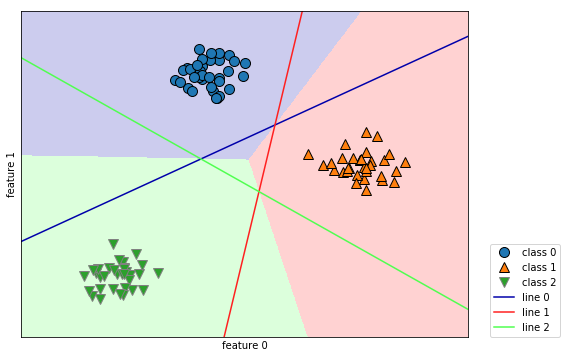

In [50]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

import sys
sys.path.append('..')
import mglearn

X, y = make_blobs(random_state=42)
print(c('shape of input', X.shape))
print(c('shape of target', y.shape))

linear_svm = LinearSVC().fit(X, y)
print(c('shape of coefficient', linear_svm.coef_.shape))
print(c('shape of intercept', linear_svm.intercept_.shape))

# 경계 및 영역 시각화
plt.figure(figsize=(8, 6))
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.2)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['class 0', 'class 1', 'class 2', 'line 0', 'line 1', 'line 2'], loc=(1.05, 0))
plt.xlabel('feature 0')
plt.ylabel('feature 1')

- **<span style="color:#C22">장단점과 매개변수</span>**<br><br>
    
    - **설명**
        1. 선형 모델의 주요 매개변수는 alpha 값
        2. LinearSVC와 LogisticRegression은 C 값 (특히 회귀에서)
        3. **alpha 값이 크고, C 값이 작을수록 모델이 단순해짐**
        4. L1, L2 규제 선택 => 중요한 특성이 별로 없는 것 같으면 L1<br><br>
    
    - **강점**
        1. **학습 속도가 빠르고 예측도 빠름**
        2. 매우 큰 데이터 셋, 희소 데이터 셋도 좋음
        3. 샘플에 비해 특성이 많을 때 잘 작동함<br><br>
    
    - **약점**
        1. 모델(계수 등) 분석이 어려울 때가 종종 있음
        2. **저차원 데이터 셋은 다른 모델의 일반화 성능이 더 좋음** (2.3.7절 참고)<br><br><br>
        
    - **대용량 데이터 셋을 위한 선형 모델**<br><br>
        - LogisticRegression과 Ridge에 solver="sag" 옵션 설정
            - 확률적 평균 경사 하강법(Stochastic Average Gradient Descent)을 의미함
        - 대용량 처리 버전인 SGDClassifier 또는 SGDRegressor